In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breakthrough-tech-ai-studio-challenge/sample_submission.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_keywords.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_metadata.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/train.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/test.csv


In [2]:
movie_keywords = pd.read_csv('/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_keywords.csv')
movie_keywords

,id,keywords
0,1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46333,176269,"[{'id': 10703, 'name': 'tragic love'}]"
46334,176271,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46335,176273,[]
46336,176275,[]


In [3]:
movie_keywords.shape

(46338, 2)

In [4]:
first_line = movie_keywords.keywords.iloc[0]
first_line

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [5]:
#find empty strings in movie_keywords
movie_keywords.keywords.isnull().values.any()

#However we know from looking at the data that some objects are empty -> further investigation need to happen

False

In [6]:
#There are 14750 values that have no useful keywords -> bring it up in todays meeting
# Question: what do you think we should do about them?
movie_keywords[movie_keywords.keywords == '[]'].shape[0]

14750

In [7]:
movies_metadata = pd.read_csv('/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_metadata.csv')
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45379,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45380,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45381,False,NaN,0,[],NaN,176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [8]:
movies_metadata.shape

(45383, 24)

In [9]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45383 entries, 0 to 45382
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45383 non-null  bool   
 1   belongs_to_collection  4486 non-null   object 
 2   budget                 45383 non-null  int64  
 3   genres                 45383 non-null  object 
 4   homepage               7765 non-null   object 
 5   id                     45383 non-null  int64  
 6   imdb_id                45383 non-null  object 
 7   original_language      45372 non-null  object 
 8   original_title         45383 non-null  object 
 9   overview               44433 non-null  object 
 10  popularity             45380 non-null  float64
 11  poster_path            45005 non-null  object 
 12  production_companies   45380 non-null  object 
 13  production_countries   45380 non-null  object 
 14  release_date           45302 non-null  object 
 15  re

In [10]:
#remove missing values
# drop columns homepage, belongs_to_collection
# Question -> show we also drop tagline column? 
movies_metadata = movies_metadata.drop(['homepage', 'belongs_to_collection', 'tagline'], axis=1)
movies_metadata

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0
45379,False,0,"[{'id': 18, 'name': 'Drama'}]",176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45380,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45381,False,0,[],176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [11]:
movies_metadata.isnull().values.any()

True

In [12]:
movies_metadata.isna().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                950
popularity                3
poster_path             378
production_companies      3
production_countries      3
release_date             81
revenue                   3
runtime                 258
spoken_languages          3
status                   83
title                     3
video                     3
vote_average              3
vote_count                3
dtype: int64

<AxesSubplot:xlabel='index'>

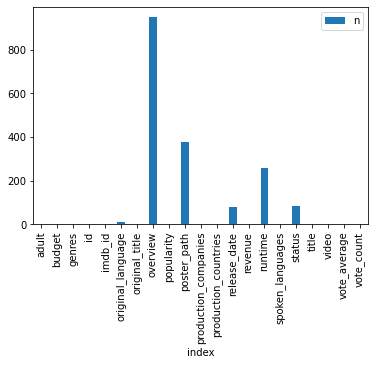

In [13]:
movies_metadata.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90)


In [14]:
column_name_num = list(movies_metadata.select_dtypes(include=[np.number]))
column_name_num

['budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count']

In [15]:
#fill the missing values in popularity, vote_average, runtime, revenue, vote_count with the mean value
popularity_mean = movies_metadata.popularity.mean()
vote_average_mean = movies_metadata.vote_average.mean()
runtime_mean = movies_metadata.runtime.mean()
revenue_mean = movies_metadata.revenue.mean()
vote_count_mean = movies_metadata.vote_count.mean()

movies_metadata.popularity.fillna(value=popularity_mean, inplace=True)
movies_metadata.vote_average.fillna(value=vote_average_mean, inplace=True)
movies_metadata.runtime.fillna(value=runtime_mean, inplace=True)
movies_metadata.revenue.fillna(value=revenue_mean, inplace=True)
movies_metadata.vote_count.fillna(value=vote_count_mean, inplace=True)

In [16]:
movies_metadata.isna().sum() 

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                950
popularity                0
poster_path             378
production_companies      3
production_countries      3
release_date             81
revenue                   0
runtime                   0
spoken_languages          3
status                   83
title                     3
video                     3
vote_average              0
vote_count                0
dtype: int64

In [17]:
#indexes of rows with missing values in column overview
# movies_metadata[movies_metadata['overview'].isnull()].index.tolist()

In [18]:
#remove rows with nul values in column title, video, production_countries, production_companies, spoken_languages -> theay are the same row
print(movies_metadata[movies_metadata['title'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['video'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['production_countries'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['production_companies'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['spoken_languages'].isnull()].index.tolist())

movies_metadata = movies_metadata.drop([19676, 29435, 35512])
movies_metadata

[19676, 29435, 35512]
[19676, 29435, 35512]
[19676, 29435, 35512]
[19676, 29435, 35512]
[19676, 29435, 35512]


,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0
45379,False,0,"[{'id': 18, 'name': 'Drama'}]",176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45380,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45381,False,0,[],176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [19]:
movies_metadata.isna().sum() 

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                950
popularity                0
poster_path             375
production_companies      0
production_countries      0
release_date             78
revenue                   0
runtime                   0
spoken_languages          0
status                   80
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

In [20]:
#find the percentage of missing values in all columns
movies_metadata.isnull().mean() * 100

# as all the other columns' missing data are less than 5% we can ignore them

adult                   0.000000
budget                  0.000000
genres                  0.000000
id                      0.000000
imdb_id                 0.000000
original_language       0.024240
original_title          0.000000
overview                2.093433
popularity              0.000000
poster_path             0.826355
production_companies    0.000000
production_countries    0.000000
release_date            0.171882
revenue                 0.000000
runtime                 0.000000
spoken_languages        0.000000
status                  0.176289
title                   0.000000
video                   0.000000
vote_average            0.000000
vote_count              0.000000
dtype: float64